In [58]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# import seaborn as sns
# from statsmodels import api
from scipy import stats
from scipy.optimize import minimize 
import json
# import pprint


In [59]:
# This function cleans the data and creates c_0, c_f, and log_c_f

def cleanData(df):
    # Remove unnecessary columns
    df = df.drop('Link', axis=1)
    df = df[df['Cited by'] > 0]
    df['c_0'] = 0


    # Calc c_0      
    c_0 = {
        2001: df.loc[df['Year'] == 2001, 'Cited by'].mean(),
        2002: df.loc[df['Year'] == 2002, 'Cited by'].mean(),
        2003: df.loc[df['Year'] == 2003, 'Cited by'].mean(),
        2004: df.loc[df['Year'] == 2004, 'Cited by'].mean(),
        2005: df.loc[df['Year'] == 2005, 'Cited by'].mean(),
        2006: df.loc[df['Year'] == 2006, 'Cited by'].mean(),
        2007: df.loc[df['Year'] == 2007, 'Cited by'].mean(),
        2008: df.loc[df['Year'] == 2008, 'Cited by'].mean(),
        2009: df.loc[df['Year'] == 2009, 'Cited by'].mean(),
        2010: df.loc[df['Year'] == 2010, 'Cited by'].mean(),
        2011: df.loc[df['Year'] == 2011, 'Cited by'].mean(),
        2012: df.loc[df['Year'] == 2012, 'Cited by'].mean(),
        2013: df.loc[df['Year'] == 2013, 'Cited by'].mean(),
        2014: df.loc[df['Year'] == 2014, 'Cited by'].mean(),
        2015: df.loc[df['Year'] == 2015, 'Cited by'].mean(),
        2016: df.loc[df['Year'] == 2016, 'Cited by'].mean(),
        2017: df.loc[df['Year'] == 2017, 'Cited by'].mean(),
        2018: df.loc[df['Year'] == 2018, 'Cited by'].mean(),
        2019: df.loc[df['Year'] == 2019, 'Cited by'].mean()
    }
    for index, row in df.iterrows():
        df['c_0'][index] = c_0[row['Year']]
  
    # Calc c_f
    df['c_f'] = df['Cited by'] / df['c_0']

    df['log_c_f'] = np.log(df['c_f'])

    return df




In [60]:
# This function defines the log-likelihood function that is used in the optimisation

def get_opti_fun(df):
   # MLE function
   def MLE_Norm(parameters):
      # extract parameters
      mu, sigma = parameters
      # Calculate the log-likelihood for normal distribution
      ##LL = np.sum(stats.norm.logpdf(df['log_c_f'], loc=mu, scale=sigma))
      LL = np.sum(stats.norm.logpdf(x=df["log_c_f"], loc = mu, scale = sigma))
      
      # Calculate the negative log-likelihood
      neg_LL = -1*LL
      return neg_LL
   return MLE_Norm

In [61]:
# Load data sets

sen_tec = pd.read_csv('sensor_technology.csv')
col_sys = pd.read_csv('Swarming_MultiAgent.csv')
tec_mob = pd.read_csv('Robotics.csv')
cont_alg = pd.read_csv('ControlSystems_Algorithms.csv')
loc_map = pd.read_csv('Localization_mapping.csv')
sen_fus = pd.read_csv('sensor_fusion.csv')
ai_ml = pd.read_csv('AI_ML.csv')
edg_com = pd.read_csv('EdgeComputing.csv')
com_net = pd.read_csv('Communications_Networking.csv')
ene_mgm = pd.read_csv('EnergyManagement.csv')
sim_mod = pd.read_csv('Simulation_Modeling.csv')
hum_man  = pd.read_csv('HumanMachineInteraction.csv')
cyb_sec = pd.read_csv('CyberSecurity.csv')
eth_reg =pd.read_csv('EthicsRegulations.csv')


dataSets = [sen_tec, col_sys, tec_mob, cont_alg, loc_map, sen_fus, ai_ml, edg_com, com_net, ene_mgm, sim_mod, hum_man, cyb_sec, eth_reg]
keyNames = ["sen_tec", "col_sys", "tec_mob", "cont_alg", "loc_map", "sen_fus", "ai_ml", "edg_com", "com_net", "ene_mgm", "sim_mod", "hum_man", "cyb_sec", "eth_reg"]

In [62]:
# Function that performs the maximum likelihood-estimation. Outputs a dict of parameters for each technology

def MLE_estimation(dataSets, keyNames):

    parameterDict = {}
    initParams = [1,1]
    
    for index, df in enumerate(dataSets):
        df = cleanData(df)

        mle = minimize(get_opti_fun(df), initParams, method='Nelder-Mead')
        mu = mle.x[0]
        sigma = mle.x[1]
        parameterDict.update({keyNames[index]: {'mu': mu}})
        parameterDict[keyNames[index]].update({'sigma': sigma})

    return parameterDict

        

In [63]:
# Perform the estimation

parameters = MLE_estimation(dataSets, keyNames)

/var/folders/9r/w8p_5y0s0913xqcffg4y86sr0000gn/T/ipykernel_4879/1464029319.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['c_0'][index] = c_0[row['Year']]
/var/folders/9r/w8p_5y0s0913xqcffg4y86sr0000gn/T/ipykernel_4879/1464029319.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['c_0'][index] = c_0[row['Year']]
/var/folders/9r/w8p_5y0s0913xqcffg4y86sr0000gn/T/ipykernel_4879/1464029319.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [64]:
with open("distribution_params.json", "w") as write_file:
    json.dump(parameters, write_file, indent=4)

In [65]:
parameters

{'sen_tec': {'mu': -1.0297326801999347, 'sigma': 1.3404911613435304},
 'col_sys': {'mu': -0.9461036176882596, 'sigma': 1.332201592813137},
 'tec_mob': {'mu': -1.0397400316131877, 'sigma': 1.3460722188956384},
 'cont_alg': {'mu': -1.0427555449812216, 'sigma': 1.3264669034859584},
 'loc_map': {'mu': -1.1167581660925023, 'sigma': 1.3839271510852504},
 'sen_fus': {'mu': -0.9975095140834809, 'sigma': 1.353541792479333},
 'ai_ml': {'mu': -1.0233667262921435, 'sigma': 1.3687179561646308},
 'edg_com': {'mu': -1.093105534091878, 'sigma': 1.4512918210165346},
 'com_net': {'mu': -1.0993574697305517, 'sigma': 1.380774568754556},
 'ene_mgm': {'mu': -1.0105511318701632, 'sigma': 1.3723071559674564},
 'sim_mod': {'mu': -0.9376523622485232, 'sigma': 1.3064015593960823},
 'hum_man': {'mu': -0.945080484603381, 'sigma': 1.3234131782497522},
 'cyb_sec': {'mu': -0.9787694570388833, 'sigma': 1.3107749554405228},
 'eth_reg': {'mu': -0.8686002674864691, 'sigma': 1.3201118773128298}}

In [72]:
def plot_dist(dataSets, parameters=parameters, keyNames=keyNames):
    
    key_names = ["sen_tec", "col_sys", "tec_mob", "cont_alg", "loc_map", "sen_fus", "ai_ml", "edg_com", "com_net", "ene_mgm", "sim_mod", "hum_man", "cyb_sec", "eth_reg"]

    for index, df in enumerate(dataSets):
        mu = parameters[keyNames[index]]["mu"]
        sigma = parameters[keyNames[index]]["sigma"]
        dist = stats.lognorm([sigma], loc=mu)
        x = np.linspace(0,100,1000)
        plt.xlabel("c_f")
        plt.ylabel("P(c|c_0)")
        plt.legend(key_names, )
        plt.xscale("log")
        plt.yscale("log")
        plt.plot(x,dist.pdf(x))

In [73]:
def plot_dist2(dataSets, parameters=parameters, keyNames=keyNames):
    
    key_names = ["sen_tec", "col_sys", "tec_mob", "cont_alg", "loc_map", "sen_fus", "ai_ml", "edg_com", "com_net", "ene_mgm", "sim_mod", "hum_man", "cyb_sec", "eth_reg"]
    
    for index, df in enumerate(dataSets):
        mu = parameters[keyNames[index]]["mu"]
        sigma = parameters[keyNames[index]]["sigma"]
        dist = stats.norm(loc=mu, scale = sigma)
        
        x = np.linspace(-2,5,2000)
        
        p = dist.pdf(np.log(x))
        
        
        plt.plot(x,p)
        plt.legend(key_names, )
        
        
        # plt.xlabel("c_f")
        # plt.ylabel("P(c|c_0)")
        # plt.legend(key_names, )
        # #plt.xscale("log")
        # #plt.yscale("log")
        # plt.plot(x,dist.pdf(x))

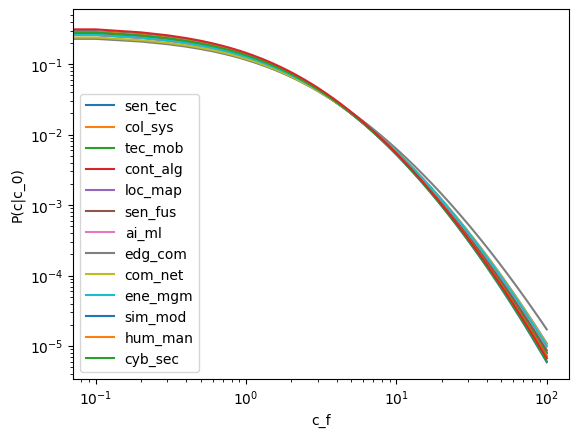

In [74]:
plot_dist(dataSets)

/var/folders/9r/w8p_5y0s0913xqcffg4y86sr0000gn/T/ipykernel_4879/1702919767.py:12: RuntimeWarning: invalid value encountered in log
  p = dist.pdf(np.log(x))


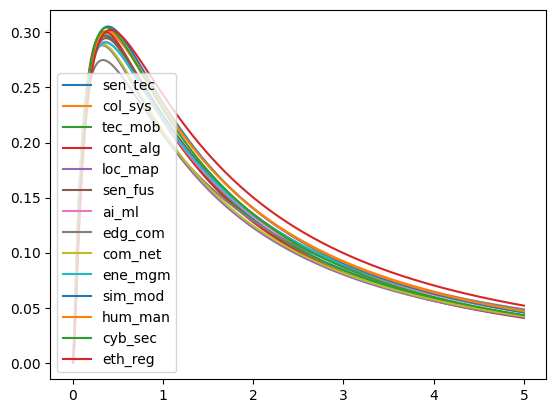

In [75]:
plot_dist2(dataSets)

<Axes: >

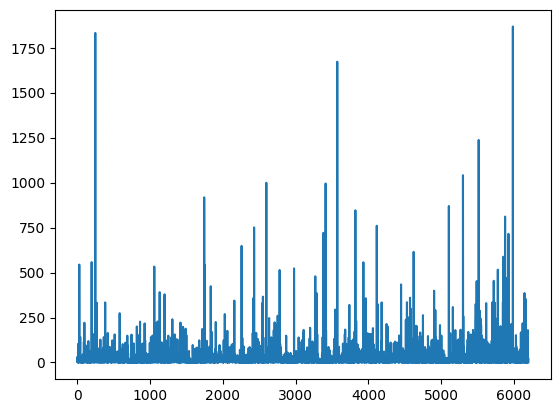

In [77]:
ene_mgm["Cited by"].plot()

In [71]:
cyb_sec

,Titles,Year,Cited by,Link
0,The Current Situation of Insider Threats Detec...,2018,0,https://www.scopus.com/inward/record.uri?eid=2...
1,Cyber Security - Securing electrical power tra...,2018,0,https://www.scopus.com/inward/record.uri?eid=2...
2,Intrusion Detection in Smart Grid Using Data M...,2018,9,https://www.scopus.com/inward/record.uri?eid=2...
3,"Exploring Lekagul Sensor Events using Rules, A...",2018,0,https://www.scopus.com/inward/record.uri?eid=2...
4,Privacy-Preserving Aggregation of Controllable...,2018,1,https://www.scopus.com/inward/record.uri?eid=2...
...,...,...,...,...
19723,L1 group consensus of multi-agent systems with...,2013,13,https://www.scopus.com/inward/record.uri?eid=2...
19724,Using robots and contract learning to teach cy...,2013,17,https://www.scopus.com/inward/record.uri?eid=2...
19725,Security issues of online social networks,2013,5,https://www.scopus.com/inward/record.uri?eid=2...
19726,"Cybersecurity, massive data processing, commun...",2013,7,https://www.scopus.com/inward/record.uri?eid=2...
